In [1]:
import pickle
import os

PIK = "claim_and_title.data"

if not os.path.isfile(PIK):
    # Download file
    !wget https://benhoyle.github.io/notebooks/title_generation/claim_and_title.data

with open(PIK, "rb") as f:
    print("Loading data")
    data = pickle.load(f)
    print("{0} samples loaded".format(len(data)))
    
print("\n\nAdding start and stop tokens to output")
data = [(c, "startseq {0} stopseq".format(t)) for c, t in data]
                                      
print("\n\nAn example title:", data[0][1])
print("----")
print("An example claim:", data[0][0])

Loading data
30000 samples loaded


Adding start and stop tokens to output


An example title: startseq System and method for session restoration at geo-redundant gateways stopseq
----
An example claim: 
1. A method for managing a backup service gateway (SGW) associated with a primary SGW, the method comprising:
periodically receiving from the primary SGW at least a portion of corresponding UE session state information, the received portion of session state information being sufficient to enable the backup SGW to indicate to an inquiring management entity that UEs having an active session supported by the primary SGW are in a live state; and
in response to a failure of the primary SGW, the backup SGW assuming management of IP addresses and paths associated with said primary SGW and transmitting a Downlink Data Notification (DDN) toward a Mobility Management Entity (MME) for each of said UEs having an active session supported by the failed primary SGW to detach from the network and reat

In [2]:
from ludwig_model import LudwigModel

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
lw = LudwigModel(
    encoder_texts=[d[0] for d in data],
    decoder_texts=[d[1] for d in data],
    encoder_seq_length=300,
    decoder_seq_length=22,
    num_encoder_tokens=2500,
    num_decoder_tokens=2500,
    latent_dim=128,
    weights_file="class_ludwigmodel.hdf5",
    training_set_size=250
)

Fitting tokenizers
Our input data has shape (30000, 300) and our output data has shape (30000, 22)
Generating training and test data
Building model
Loading GloVe 100d embeddings from file
Found 400000 word vectors.
Building embedding matrix
Compiling model
Loaded weights


Training for epoch 0
Training on batch 0 to 250 of 24000
Train on 2639 samples, validate on 655 samples
Epoch 1/1
2639/2639 [==============================] - 23s 9ms/step - loss: 2.2396 - val_loss: 2.3552
Training on batch 250 to 500 of 24000
Train on 2484 samples, validate on 658 samples
Epoch 1/1
2484/2484 [==============================] - 21s 9ms/step - loss: 2.1123 - val_loss: 2.3149
Training on batch 500 to 750 of 24000
Train on 2586 samples, validate on 583 samples
Epoch 1/1
2586/2586 [==============================] - 22s 9ms/step - loss: 2.2179 - val_loss: 2.5619
Training on batch 750 to 1000 of 24000
Train on 2613 samples, validate on 667 samples
Epoch 1/1
2613/2613 [==============================] - 23s 9ms/step - loss: 2.2897 - val_loss: 2.3054
Training on batch 1000 to 1250 of 24000
Train on 2532 samples, validate on 687 samples
Epoch 1/1
2532/2532 [==============================] - 22s 9ms/step - loss: 2.2084 - val_loss: 2.8254
Training on batch 1250 to 1500 of 24000
Tra

2465/2465 [==============================] - 22s 9ms/step - loss: 2.2284 - val_loss: 2.5518
Training on batch 11000 to 11250 of 24000
Train on 2399 samples, validate on 669 samples
Epoch 1/1
2399/2399 [==============================] - 21s 9ms/step - loss: 2.1256 - val_loss: 2.5017
Training on batch 11250 to 11500 of 24000
Train on 2476 samples, validate on 669 samples
Epoch 1/1
2476/2476 [==============================] - 22s 9ms/step - loss: 2.2369 - val_loss: 2.4428
Training on batch 11500 to 11750 of 24000
Train on 2450 samples, validate on 648 samples
Epoch 1/1
2450/2450 [==============================] - 23s 9ms/step - loss: 2.1414 - val_loss: 2.4737
Training on batch 11750 to 12000 of 24000
Train on 2553 samples, validate on 646 samples
Epoch 1/1
2553/2553 [==============================] - 23s 9ms/step - loss: 2.1628 - val_loss: 2.3205
Training on batch 12000 to 12250 of 24000
Train on 2395 samples, validate on 595 samples
Epoch 1/1
2395/2395 [==============================] - 

2534/2534 [==============================] - 22s 9ms/step - loss: 2.1311 - val_loss: 2.3984
Training on batch 21750 to 22000 of 24000
Train on 2515 samples, validate on 693 samples
Epoch 1/1
2515/2515 [==============================] - 24s 9ms/step - loss: 2.2098 - val_loss: 2.5869
Training on batch 22000 to 22250 of 24000
Train on 2586 samples, validate on 627 samples
Epoch 1/1
2586/2586 [==============================] - 22s 9ms/step - loss: 1.9605 - val_loss: 2.3664
Training on batch 22250 to 22500 of 24000
Train on 2543 samples, validate on 676 samples
Epoch 1/1
2543/2543 [==============================] - 23s 9ms/step - loss: 2.0668 - val_loss: 2.5377
Training on batch 22500 to 22750 of 24000
Train on 2487 samples, validate on 582 samples
Epoch 1/1
2487/2487 [==============================] - 21s 9ms/step - loss: 2.1962 - val_loss: 2.2233
Training on batch 22750 to 23000 of 24000
Train on 2557 samples, validate on 610 samples
Epoch 1/1
2557/2557 [==============================] - 

2476/2476 [==============================] - 23s 9ms/step - loss: 2.0047 - val_loss: 2.6365
Training on batch 6000 to 6250 of 24000
Train on 2531 samples, validate on 637 samples
Epoch 1/1
2531/2531 [==============================] - 24s 10ms/step - loss: 2.0407 - val_loss: 2.2870
Training on batch 6250 to 6500 of 24000
Train on 2574 samples, validate on 602 samples
Epoch 1/1
2574/2574 [==============================] - 24s 9ms/step - loss: 2.2187 - val_loss: 2.2592
Training on batch 6500 to 6750 of 24000
Train on 2479 samples, validate on 602 samples
Epoch 1/1
2479/2479 [==============================] - 23s 9ms/step - loss: 2.1851 - val_loss: 2.5914
Training on batch 6750 to 7000 of 24000
Train on 2548 samples, validate on 625 samples
Epoch 1/1
2548/2548 [==============================] - 24s 10ms/step - loss: 2.1229 - val_loss: 2.4509
Training on batch 7000 to 7250 of 24000
Train on 2603 samples, validate on 671 samples
Epoch 1/1
2603/2603 [==============================] - 25s 9ms/

2562/2562 [==============================] - 25s 10ms/step - loss: 2.0116 - val_loss: 2.4263
Training on batch 16750 to 17000 of 24000
Train on 2482 samples, validate on 651 samples
Epoch 1/1
2482/2482 [==============================] - 25s 10ms/step - loss: 1.9909 - val_loss: 2.4011
Training on batch 17000 to 17250 of 24000
Train on 2656 samples, validate on 616 samples
Epoch 1/1
2656/2656 [==============================] - 25s 9ms/step - loss: 2.1666 - val_loss: 2.3728
Training on batch 17250 to 17500 of 24000
Train on 2466 samples, validate on 654 samples
Epoch 1/1
2466/2466 [==============================] - 25s 10ms/step - loss: 2.0429 - val_loss: 2.4179
Training on batch 17500 to 17750 of 24000
Train on 2575 samples, validate on 645 samples
Epoch 1/1
2575/2575 [==============================] - 25s 10ms/step - loss: 2.1424 - val_loss: 2.2811
Training on batch 17750 to 18000 of 24000
Train on 2452 samples, validate on 706 samples
Epoch 1/1
2452/2452 [==============================

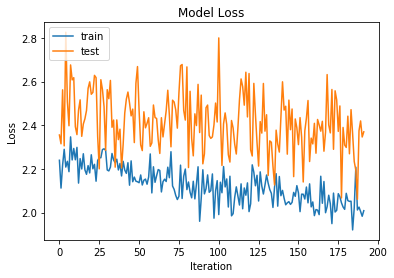

In [4]:
lw.train()

```
Training on batch 23250 to 23500 of 24000
Train on 2538 samples, validate on 637 samples
Epoch 1/1
2538/2538 [==============================] - 25s 10ms/step - loss: 2.0055 - val_loss: 2.4196
Training on batch 23500 to 23750 of 24000
Train on 2373 samples, validate on 637 samples
Epoch 1/1
2373/2373 [==============================] - 22s 9ms/step - loss: 1.9834 - val_loss: 2.3462
Training on batch 23750 to 24000 of 24000
Train on 2593 samples, validate on 590 samples
Epoch 1/1
2593/2593 [==============================] - 25s 10ms/step - loss: 2.0090 - val_loss: 2.3698
```

In [8]:
lw.example_output(number=10)

Sample of claim text: 1 a non transitory computer readable medium configured to store computer executable instructions comprising a media service the media service comprising a request processor configured to process a tra

Predicted title is: method and system for managing media content  
Actual title is: media service and method for delivery of stored media  
---
Sample of claim text: 1 a non transitory computer readable storage medium storing a program of instructions executable by a machine to perform a method of comprising receiving a candidate answer and supporting pieces of an

Predicted title is: method and system for generating and editing a schema for a plurality of models  
Actual title is:  
---
Sample of claim text: 1 a method of assessing memory performance of a workload running on a host machine comprising selecting a subset of memory pages for the workload maintaining a least used data structure for the select

Predicted title is: memory system and method  
Actual title

In [9]:
lw.print()

Training Model:

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 300)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 22)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 300, 100)     250000      input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 128)          117248      embedding_1[0][0]          

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


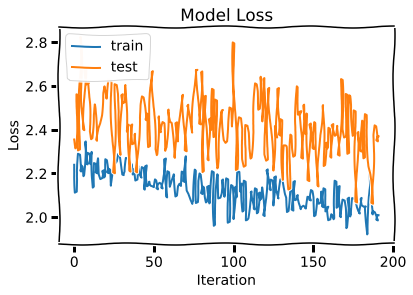

In [10]:
import matplotlib.pyplot as plt
with plt.xkcd():
    plt.plot(lw.train_loss)
    plt.plot(lw.val_loss)
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Iteration')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [12]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import Image
Image(model_to_dot(lw.model, show_shapes=True).create_png(prog='dot'))

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.